## Required Imports

In [ ]:
import sys, tweepy
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

# Consumer Key / ApI Key = '1ZgTj3ODnN0xDe5WTxiExD7Rb'
# Consumer Secret Key / API SecretKey = 'p307KMWBtA2gbZaggFulbkBB7kMYYr246yfBBovavgy5hfato0'
# ACCESS Token = '1284894098436972545-NaZIOCYcyu6Tan6k2dATGeMPekGNbK'
# ACCESS Token Secret = 'X0fDOMXT8fr3P61VKKljHCE6wdF3RA4Nx28FndgTtXpPq'

## Twitter Authentication and Api

In [ ]:
# ApiKey And ApiSecret Key
consumerKey = '1ZgTj3ODnN0xDe5WTxiExD7Rb'
consumerSecret = 'p307KMWBtA2gbZaggFulbkBB7kMYYr246yfBBovavgy5hfato0'

accessToken = '1284894098436972545-NaZIOCYcyu6Tan6k2dATGeMPekGNbK'
accessTokenSecret = 'X0fDOMXT8fr3P61VKKljHCE6wdF3RA4Nx28FndgTtXpPq'
# authentication
auth = tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

## Input Data

In [ ]:
search_text = input("Enter Keyword/hashtag to search about:")
totalTweets = int(input("Enter How Many Tweets You Want To Analyse:"))

Enter Keyword/hashtag to search about:Prabhas
Enter How Many Tweets You Want To Analyse:100


## Extracting Tweets and Processing

In [ ]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

tweets = tweepy.Cursor(api.search, q = search_text, language = 'English').items(totalTweets)

positive = 0
negative = 0
neutral  = 0
polarity = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if   (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1 

positive = percentage(positive, totalTweets)
negative = percentage(negative, totalTweets)
neutral  = percentage(neutral,  totalTweets)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral  = format(neutral,  '.2f')

### Conclusion On Tweets

In [ ]:
# Peoples Reaction
print("How people are reacting on " + search_text + " by analyzing " + str(totalTweets) + " tweets.")
if polarity == 0:
    print("Neutral")
elif polarity < 0:
    print("Negative")
elif polarity > 0:
    print("Positive")

How people are reacting on Prabhas by analyzing 100 tweets.
Positive


## Plot Pie Plot On People Reaction 

['37.00', '10.00', '53.00']


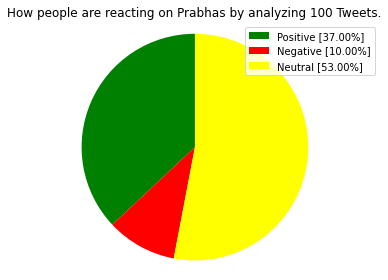

In [ ]:
# Plot the pie plot On The people reaction
labels = ['Positive [' + str(positive) + '%]', 'Negative [' + str(negative) + '%]', 'Neutral [' + str(neutral) + '%]']
sizes  = [positive, negative, neutral]
print(sizes)
colors = ['green', 'red', 'yellow']
patches, texts = plt.pie(sizes, colors= colors, startangle= 90)
plt.legend(patches, labels, loc = "best")
plt.title('How people are reacting on ' + search_text + ' by analyzing ' + str(totalTweets) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Plot Bar Chart On People Reaction

['37.00', '10.00', '53.00']


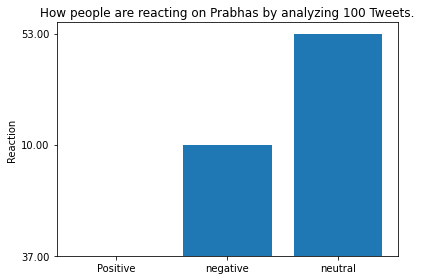

In [ ]:
# Plot the Bar plot On The people reaction
x = ("Positive", "negative", "neutral")
y  = [positive, negative, neutral]
print(y)
y_pos = np.arange(len(x))

plt.bar(x, y)
plt.xticks(y_pos, ("Positive", "negative", "neutral"))
plt.ylabel("Reaction")
plt.title( 'How people are reacting on ' + search_text + ' by analyzing ' + str(totalTweets) + ' Tweets.')
plt.tight_layout()
plt.show()